### Sample Linear regression 
with salary data from kaggle (https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression/data)
the data have 2 columns years of experience (x) and salary (y)


In [248]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [249]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [250]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


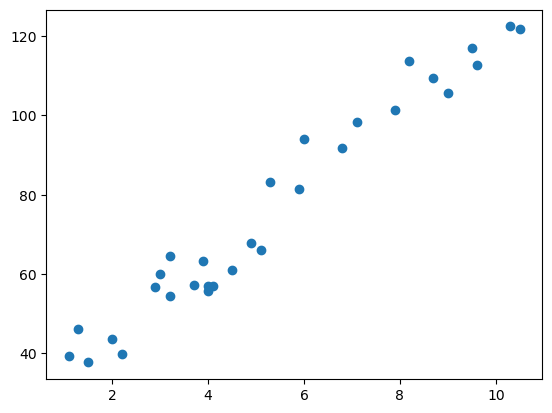

In [251]:
plt.scatter(df['YearsExperience'],df['Salary']/1000)

In [252]:
# make x and y 
num= len(df["Salary"])
per80 = int(num*0.8)

per80

24

In [253]:
yrs_train = df["YearsExperience"][0:per80]
X_train = torch.Tensor(yrs_train.to_numpy()).unsqueeze(1)

yrs_test = df["YearsExperience"][per80:]
X_test = torch.Tensor(yrs_test.to_numpy()).unsqueeze(1)

sal_train = df["Salary"][0:per80]/1000
y_train = torch.Tensor(sal_train.to_numpy()).unsqueeze(1)

sal_test = df["Salary"][per80:]/1000
y_test = torch.Tensor(sal_test.to_numpy()).unsqueeze(1)

y_train,y_test


(tensor([[ 39.3430],
         [ 46.2050],
         [ 37.7310],
         [ 43.5250],
         [ 39.8910],
         [ 56.6420],
         [ 60.1500],
         [ 54.4450],
         [ 64.4450],
         [ 57.1890],
         [ 63.2180],
         [ 55.7940],
         [ 56.9570],
         [ 57.0810],
         [ 61.1110],
         [ 67.9380],
         [ 66.0290],
         [ 83.0880],
         [ 81.3630],
         [ 93.9400],
         [ 91.7380],
         [ 98.2730],
         [101.3020],
         [113.8120]]),
 tensor([[109.4310],
         [105.5820],
         [116.9690],
         [112.6350],
         [122.3910],
         [121.8720]]))

In [254]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim, output_dim):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = input_dim, out_features =output_dim)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        out = self.linear_layer(x)
        return out

model = LinearRegressionModel(1,1)

list(model.parameters())


[Parameter containing:
 tensor([[0.6585]], requires_grad=True),
 Parameter containing:
 tensor([-0.8987], requires_grad=True)]

In [255]:
#inference mode turns off the tracking of gradient
# so u don't train it on testing data 
with torch.inference_mode(): 
    y_preds = model(X_test)

In [256]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None,
                    model_weights=None,
                     model_bias=None):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=8, label="Training data")
    #plot test data 
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    if model_weights is not None and model_bias is not None and test_data is not None:
        # Plot the linear regression line
        with torch.inference_mode(): #for efficiency
            y_pred_line = model_weights * test_data + model_bias
        plt.plot(test_data.numpy(), y_pred_line.numpy(), c="orange", label="Linear Regression Line")

    
    plt.legend(prop={"size": 14});

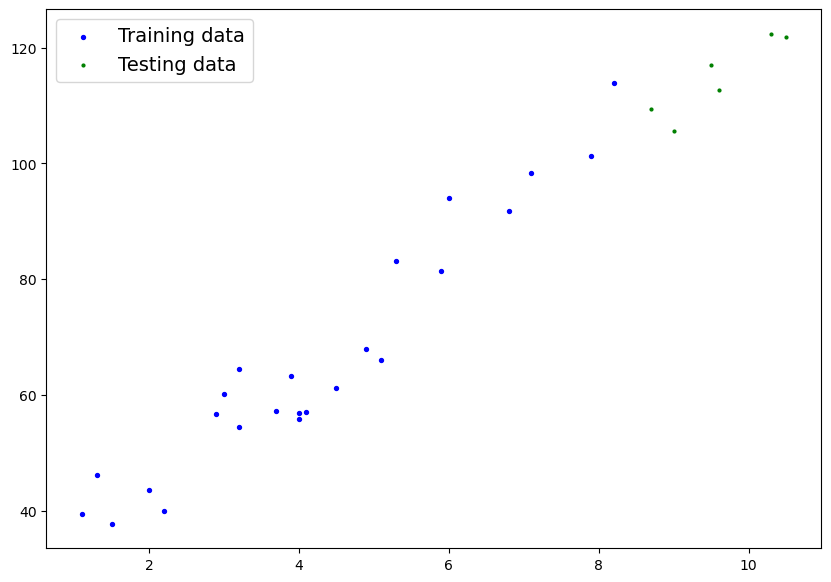

In [257]:
plot_predictions()

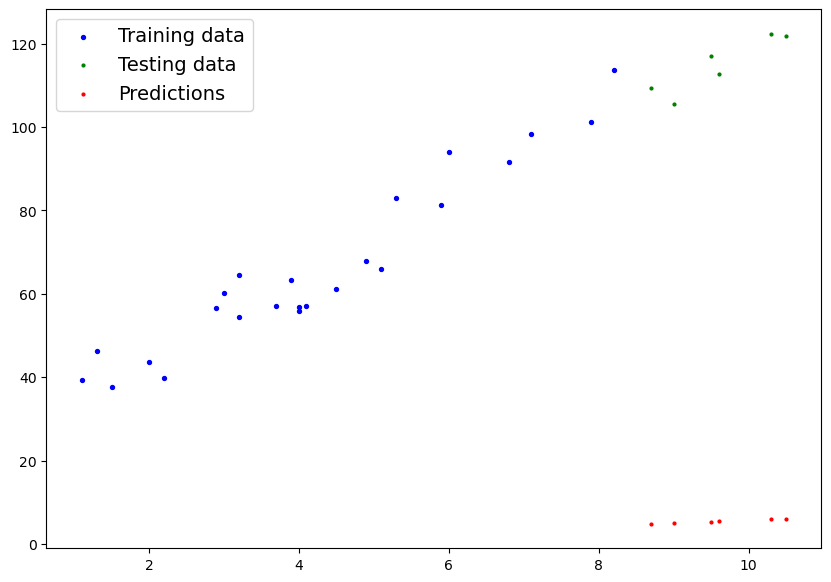

In [258]:
plot_predictions(predictions=y_preds)

### Training Model 
with the loss function (lower is better)
Optimizer tells model how to update its internal parameters to best lower the loss.

In [260]:
# Setup loss function
loss_fn= nn.L1Loss()

# Setup Optimizer
optimizer= torch.optim.SGD(model.parameters(), lr=0.8) #lr = learning Rate (Hyper parameter)

### Building the training Loop for the model

In [262]:
test_losses = []
train_losses = []

epochs = 200 # epoch is the number of iteration of the training loop
for epoch in range(epochs):
    #put model in training mode; Set the module in training mode.
    model.train()
    # 1. Forward pass on train data
    y_pred = model(X_train)
    # 2. calculate the loss 
    loss = loss_fn(y_pred, y_train)
    # 3. Zero grad of the optimizer 
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Progress the optimizer
    optimizer.step()
    # Put the model in evaluation mode for testing phase
    model.eval()

    # model test
    with torch.inference_mode():
        test_pred= model(X_test)
        test_loss = loss_fn(test_pred,y_test)
        train_losses.append(loss.detach().item())
        test_losses.append(test_loss.detach().item())

    if epoch%10==0:
        print(f"{epoch}--epoch   train loss: {loss.item():.4f}----test loss:{test_loss.item()}")
        # plot_predictions(train_data=X_train ,train_labels= y_train ,test_data=X_test ,test_labels= y_test,predictions=test_pred)

0--epoch   train loss: 64.4062----test loss:76.01487731933594
10--epoch   train loss: 8.2451----test loss:27.24112892150879
20--epoch   train loss: 7.6936----test loss:18.667781829833984
30--epoch   train loss: 7.3738----test loss:9.96643352508545
40--epoch   train loss: 7.0618----test loss:10.035758018493652
50--epoch   train loss: 7.6945----test loss:13.174407958984375
60--epoch   train loss: 6.3697----test loss:10.931757926940918
70--epoch   train loss: 6.0306----test loss:13.041106224060059
80--epoch   train loss: 6.2480----test loss:16.873090744018555
90--epoch   train loss: 6.1134----test loss:20.699735641479492
100--epoch   train loss: 6.0481----test loss:2.47417950630188
110--epoch   train loss: 6.5138----test loss:3.1300532817840576
120--epoch   train loss: 6.3448----test loss:2.7607154846191406
130--epoch   train loss: 6.1045----test loss:2.4468460083007812
140--epoch   train loss: 5.8313----test loss:3.8411991596221924
150--epoch   train loss: 6.1223----test loss:2.866546630

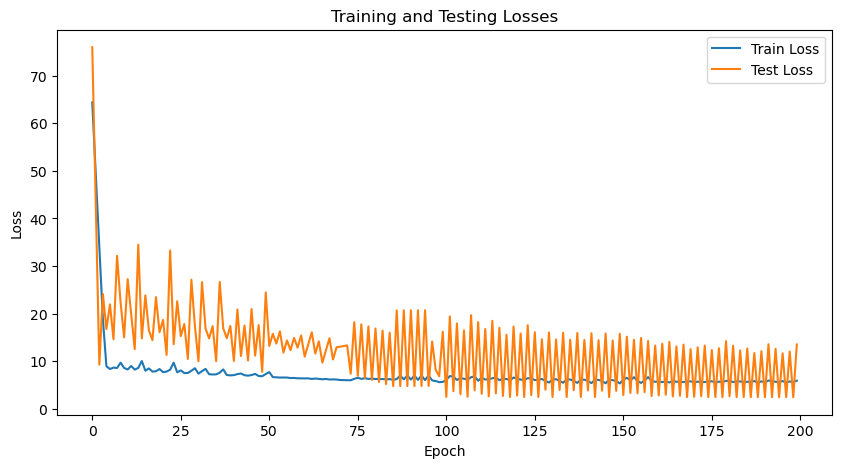

In [263]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()

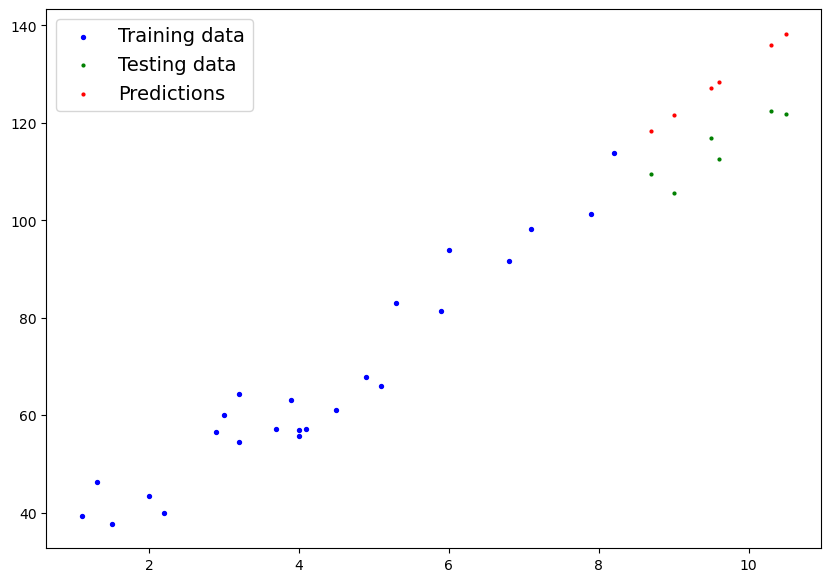

In [264]:
#inference mode turns off the tracking of gradient
# so u don't train it on testing data 
with torch.inference_mode(): 
    y_preds = model(X_test)

plot_predictions(predictions=y_preds)

In [265]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [266]:
yrs_train = df["YearsExperience"][0:per80]
X_train = torch.Tensor(yrs_train.to_numpy()).unsqueeze(1)

yrs_test = df["YearsExperience"][per80:]
X_test = torch.Tensor(yrs_test.to_numpy()).unsqueeze(1)

sal_train = df["Salary"][0:per80]/1000
y_train = torch.Tensor(sal_train.to_numpy()).unsqueeze(1)

sal_test = df["Salary"][per80:]/1000
y_test = torch.Tensor(sal_test.to_numpy()).unsqueeze(1)

y_train,y_test

(tensor([[ 39.3430],
         [ 46.2050],
         [ 37.7310],
         [ 43.5250],
         [ 39.8910],
         [ 56.6420],
         [ 60.1500],
         [ 54.4450],
         [ 64.4450],
         [ 57.1890],
         [ 63.2180],
         [ 55.7940],
         [ 56.9570],
         [ 57.0810],
         [ 61.1110],
         [ 67.9380],
         [ 66.0290],
         [ 83.0880],
         [ 81.3630],
         [ 93.9400],
         [ 91.7380],
         [ 98.2730],
         [101.3020],
         [113.8120]]),
 tensor([[109.4310],
         [105.5820],
         [116.9690],
         [112.6350],
         [122.3910],
         [121.8720]]))

In [267]:
class LinearRegressionModel2(nn.Module):
    def __init__(self,input_dim, output_dim):
        super().__init__()
        self.linear_layer_1 = nn.Linear(in_features = input_dim, out_features =5)
        self.linear_layer_2 = nn.Linear(in_features = 5, out_features =output_dim)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        out = self.linear_layer_2(self.linear_layer_1(x))
        return out

model = LinearRegressionModel2(1,1)

In [268]:
# Setup loss function
loss_fn= nn.MSELoss()

# Setup Optimizer
optimizer= torch.optim.Adam(model.parameters(), lr=0.1) #lr = learning Rate (Hyper parameter)

In [269]:
test_losses = []
train_losses = []

epochs = 200 # epoch is the number of iteration of the training loop
for epoch in range(epochs):
    #put model in training mode; Set the module in training mode.
    model.train()
    # 1. Forward pass on train data
    y_pred = model(X_train)
    # 2. calculate the loss 
    loss = loss_fn(y_pred, y_train)
    # 3. Zero grad of the optimizer 
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Progress the optimizer
    optimizer.step()
    # Put the model in evaluation mode for testing phase
    model.eval()

    # model test
    with torch.inference_mode():
        test_pred= model(X_test)
        test_loss = loss_fn(test_pred,y_test)
        train_losses.append(loss.detach().item())
        test_losses.append(test_loss.detach().item())

    if epoch%10==0:
        print(f"{epoch}--epoch   train loss: {loss.item():.4f}----test loss:{test_loss.item()}")
        # plot_predictions(train_data=X_train ,train_labels= y_train ,test_data=X_test ,test_labels= y_test,predictions=test_pred)

0--epoch   train loss: 4634.4653----test loss:11601.1123046875
10--epoch   train loss: 1060.1040----test loss:914.0818481445312
20--epoch   train loss: 559.2385----test loss:3556.9580078125
30--epoch   train loss: 89.5315----test loss:24.72062110900879
40--epoch   train loss: 92.3260----test loss:83.37938690185547
50--epoch   train loss: 80.4031----test loss:597.5518188476562
60--epoch   train loss: 56.6769----test loss:117.51480865478516
70--epoch   train loss: 49.8826----test loss:215.88218688964844
80--epoch   train loss: 47.3925----test loss:195.14918518066406
90--epoch   train loss: 44.8064----test loss:132.9906005859375
100--epoch   train loss: 42.4707----test loss:150.6116180419922
110--epoch   train loss: 40.6081----test loss:110.02301025390625
120--epoch   train loss: 39.1548----test loss:107.84297943115234
130--epoch   train loss: 38.0277----test loss:88.83129119873047
140--epoch   train loss: 37.1671----test loss:81.10594940185547
150--epoch   train loss: 36.5249----test los

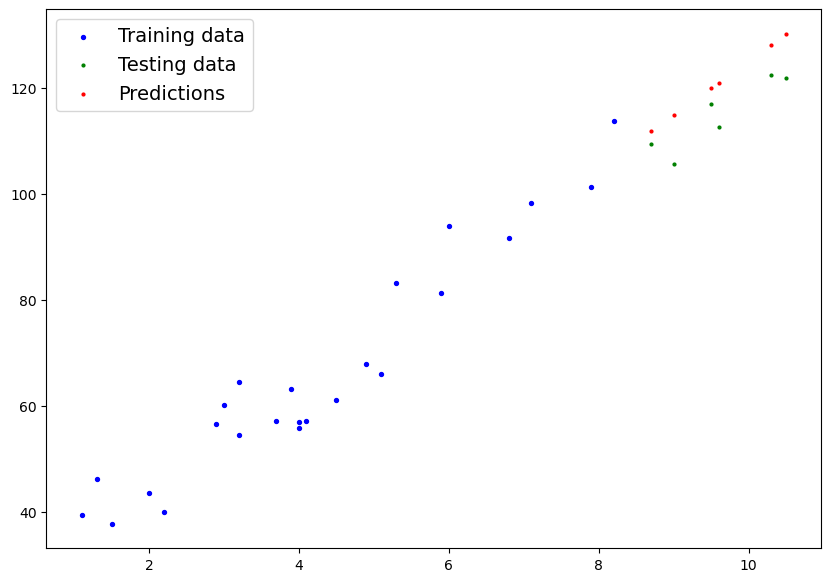

In [270]:
#inference mode turns off the tracking of gradient
# so u don't train it on testing data 
with torch.inference_mode(): 
    y_preds = model(X_test)

plot_predictions(predictions=y_preds)

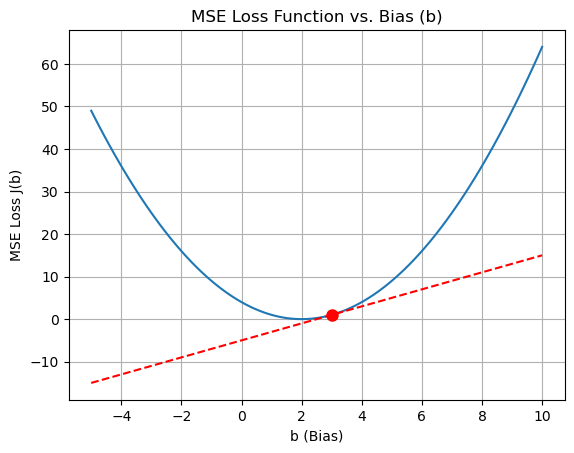

slope 2
next point 1


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = 2
y_true = 4

y_pred = 3

# Loss function
def mse_loss(b):
    return (y_true - x - b)**2
    
# Derivative of the loss function (gradient)
def gradient(b):
    return -2 * (y_true - x- b)

# Generate a range of b values
b_values = np.linspace(-5, 10, 100)  # Adjust range as needed

# Calculate loss for each b value
loss_values = [mse_loss(b) for b in b_values]

# Point where we want to plot the tangent line
b_point = 3

# Calculate the gradient (slope) at b_point
slope = gradient(b_point)

# Calculate the y-intercept of the tangent line
y_intercept = mse_loss(b_point) - slope * b_point

# Calculate the tangent line values
tangent_line = slope * b_values + y_intercept


# Plot the loss function
plt.plot(b_values, loss_values)

# Plot the tangent line (gradient line)
plt.plot(b_values, tangent_line, 'r--', label=f'Gradient Line at b = {b_point}')

# Mark the point
plt.plot(b_point, mse_loss(b_point), 'ro', markersize=8)


plt.xlabel('b (Bias)')
plt.ylabel('MSE Loss J(b)')
plt.title('MSE Loss Function vs. Bias (b)')
plt.grid(True)
plt.show()


print(f"slope {slope}")
b_new = b_point - slope
print(f"next point {b_new}")

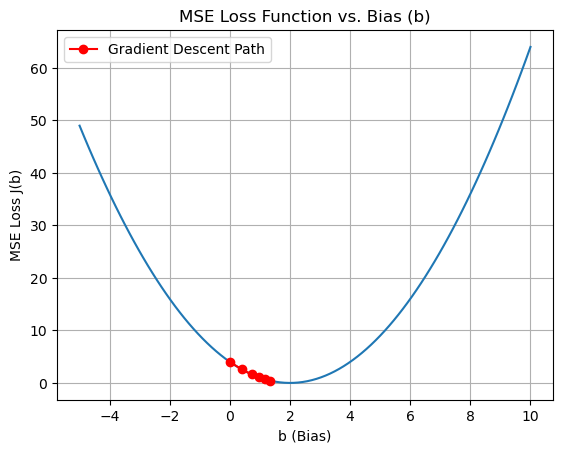

In [43]:
# Gradient Descent
b_start = 0  # Starting point for gradient descent
learning_rate = 1
num_iterations = 5  # Number of gradient descent iterations

# Store b and loss values for plotting
b_history = [b_start]
loss_history = [mse_loss(b_start)]

# Perform gradient descent
for _ in range(num_iterations):
    b_old = b_history[-1]
    b_new = b_old - learning_rate * gradient(b_old)
    b_history.append(b_new)
    loss_history.append(mse_loss(b_new))

# Plot the loss function
plt.plot(b_values, loss_values)
plt.xlabel('b (Bias)')
plt.ylabel('MSE Loss J(b)')
plt.title('MSE Loss Function vs. Bias (b)')
plt.grid(True)

# Plot the gradient descent path
plt.plot(b_history, loss_history, 'ro-', label='Gradient Descent Path')
plt.legend()

plt.show()
